# Assignment 2
This is due by 5pm on Friday 21st February. The mark breakdown is:

- Q0 [1 marks]
- Q1 [10 marks]
- Q2 [10 marks]
- Q3 [9 marks]

It is adviseable that you tidy up your notebook before submitting the final version. Also, remember to add comments to your code.

# Question 0

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Question 1: Bisection method

### Q. 1a
Define a function for the quintic $f(x) = x^5+12 x^4-15 x^3-386 x^2-180 x+1800$ and plot it in the range $x=-11\dots6$

Text(0, 0.5, 'f(x)')

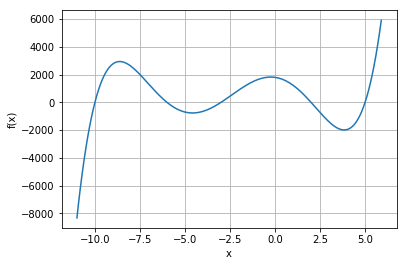

In [2]:
def f(x):
    return ((x**5)+12*(x**4)-15*(x**3)-386*(x**2)-(180*x)+1800)

x = np.arange(-11,6,0.1)
vf = np.vectorize(f)
y = vf(x)

plt.grid(True)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')

### Q. 1b
Using the plot, pick values of $a$ and $b$ such that $f(a) < 0$ and $f(b) > 0$ and the function has a **single** root in the region $(a,b)$. Assign variables called a and b to these values and print the values of $f(a)$ and $f(b)$.

In [3]:
a = -4
b = 1

print(f(a))
print(f(b))

-648
1232


Use the following FindRootBisection method to find the root to within a precision of $10^{-12}$

In [4]:
# This function only works when a < b and f(a) < 0 < f(b)
def FindRootBisection(f, a, b, tol, printSteps=False):
    left = a
    right = b
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

In [5]:
root = FindRootBisection(f,-4,1, 1e-12)
print(root)

-3.000000000000341


### Q. 1c
As the comment on the above FindRootBisection( ) function says it only works when $a<b$ and $f(a) < 0 < f(b)$. Create a new function that: 
 - **also** works when $f(a) > 0 > f(b)$. 
 - Checks that $\text{sign}(f(a)) \neq \text{sign}(f(b))$. If not the function should return "Cannot use bisection method as sign(f(a)) = sign(f(b)) ", where $a$ and $b$ have been replaced by their values
 
Call your new function FindRootBisectionImproved( ).  
Useful function: np.sign(x) will return sign(x)

Check your new function by:
 - finding the root between $x = 2.5$ and $x=6$
 - attempting to find a root between $x=6$ and $x=8$ (there is no root in this region)

In [6]:
def FindRootBisectionImproved(f,a,b,tol,printSteps=False):

    
    if np.sign(f(a)) != np.sign(f(b)):
        pass
    else:
        print("Cannot use bisection method as the sign of",((f(a))),"equals the sign of",f(b))
        return
    
    if f(a)>f(b):
        left = a
        right = b
    else:
        right = a
        left = b
    
    while left-right > tol:
        global midpoint
        midpoint = (left+right)/2
        if(f(midpoint) > 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
        
            
    return midpoint

In [7]:
print(FindRootBisectionImproved(f,2.5,6,1e-12))

4.999999999999432


In [8]:
FindRootBisectionImproved(f,6,8,1e-12)

Cannot use bisection method as the sign of 6912 equals the sign of 49896


**Commit this question to your git repository and push the changes to GitHub**

## Question 2: Newton-Raphson method

### Q. 2a
 - Define a function $p(x) = \sinh^{-1} x$. Calculate its derivative and define it as $dp(x) = \dots$
 - Plot the function between $x=-11$ and $x=6$. Label the plot axes and use a grid.

In [9]:
def p(x):
    return np.arcsinh(x)

def dp(x):
    return 1/(np.sqrt(1+x**2))

In [10]:
x = np.arange(-11,6,0.1)
vp = np.vectorize(p)
y = vp(x)

Text(0, 0.5, 'arcsinh(x)')

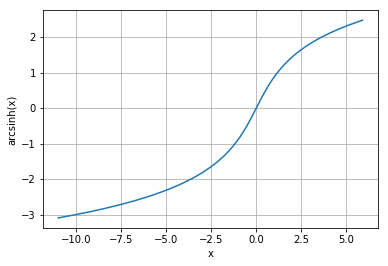

In [11]:
plt.grid(True)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("arcsinh(x)")

### Q. 2b
 - Starting with a value near the root use the below Newton-Raphson code to find the root

In [12]:
def FindRootNewtonRaphson(f, df, x0, tol, printSteps=False):
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol and count < 20:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        count += 1
        if(printSteps):
            print("x_%d = %.14lf" % (count, x0))
    return x0

In [13]:
FindRootNewtonRaphson(p, dp, -1, 1e-12)

0.0

### Q. 2c
As we discussed in the lectures, the Newton-Raphson method (usually) converges quadradically if an initial guess is given that is sufficiently close to the root. If the guess is too far from the root the method can diverge. In this question we will find the critical value between converging and diverging where the method oscilliates with period 2.

If we define $F(x) = x - p(x)/p'(x)$, then a period-2 orbit will occur when $F(F(x)) = x$. In general this will be a complicated function so it might be very difficult to find the solution analytically. Instead, we can write this equation as $F(F(x)) - x = 0$, so the value of $x$ we want is the root.

- Define a function F(x)
- Define a function F2(x) which returns $F(F(x)) - x$
- Plot F2(x) with labels and a grid

In [14]:
def F(x):
    return x-p(x)/dp(x)
def F2(x):
    return F(F(x))-x

Text(0, 0.5, 'F2(x)')

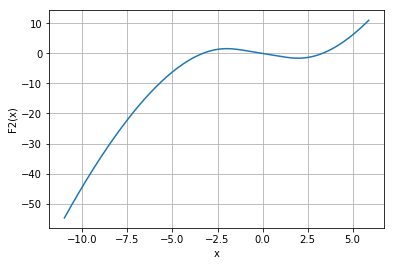

In [15]:
plt.plot(x, F2(x))
plt.grid(True)
plt.xlabel("x")
plt.ylabel('F2(x)')

- We want to find a root with $x \neq 0$. As we don't have easy access to the derivative of the function $F2(x)$ use the bisection method function from above to find a root of $F2(x)$ to a precision of $10^{-15}$. Use the plot from the previous part to bracket a root. **Assign** the vaue of the root of the variable 'x2' and also print(x2).
- Use the Newton-Raphson method with the function $p(x)$ and the initial guess x2. Set the final argument to True to print out the steps in the method takes. You should see that they oscillate between two values and the algorithm does not converge.

In [16]:
x2 = FindRootBisectionImproved(F2,-5, -2.5, 1e-15)
print(x2)

-3.319826386395148


In [17]:
FindRootNewtonRaphson(p, dp, x2, 1e-15, printSteps=True)

x_2 = 3.31982638639515
x_3 = -3.31982638639515
x_4 = 3.31982638639514
x_5 = -3.31982638639514
x_6 = 3.31982638639513
x_7 = -3.31982638639511
x_8 = 3.31982638639507
x_9 = -3.31982638639501
x_10 = 3.31982638639490
x_11 = -3.31982638639469
x_12 = 3.31982638639431
x_13 = -3.31982638639361
x_14 = 3.31982638639232
x_15 = -3.31982638638996
x_16 = 3.31982638638564
x_17 = -3.31982638637771
x_18 = 3.31982638636317
x_19 = -3.31982638633652
x_20 = 3.31982638628765


3.3198263862876463

By slightly perturbing the initial guess we can get the method to converge or diverge. Try:
 - adding $10^{-3}$ to the initial guess. Does the method converge or diverge?
 - subtracting $10^{-3}$ from the initial guess. Does the method converge or diverge?
 
In both cases set the final argument to 'True' to get the function to print the steps the method is taking

In [18]:
FindRootNewtonRaphson(p, dp, x2+1e3, 1e-15, printSteps=True)

x_2 = -6575.67836200201782
x_3 = 55789.89852175718988
x_4 = -592627.93396523268893
x_5 = 7695551.80227342806756
x_6 = -119660445.27394521236420
x_7 = 2188986319.86536264419556
x_8 = -46406185106.10568237304688
x_9 = 1125528456224.11840820312500
x_10 = -30887225698969.31640625000000
x_11 = 949921522120461.37500000000000
x_12 = -32468837869005184.00000000000000
x_13 = 1224471449373303808.00000000000000
x_14 = -50622329026466258944.00000000000000
x_15 = 2281248260744785952768.00000000000000
x_16 = -111489522948346661044224.00000000000000
x_17 = 5882339386675598272233472.00000000000000
x_18 = -333688313151178483450249216.00000000000000
x_19 = 20276702747991614603445403648.00000000000000
x_20 = -1315398721537861599928162189312.00000000000000


-1.3153987215378616e+30

In [19]:
FindRootNewtonRaphson(p, dp, x2-1e3, 1e-15, printSteps=True)

x_2 = 6626.14567932299997
x_3 = -56268.73786611238756
x_4 = 598195.29104732966516
x_5 = -7773439.97280225344002
x_6 = 120949832.82855241000652
x_7 = -2213869803.21307659149170
x_8 = 46958735643.02034759521484
x_9 = -1139485758845.76733398437500
x_10 = 31284291360019.46093750000000
x_11 = -962532689356375.12500000000000
x_12 = 32912588984084840.00000000000000
x_13 = -1241653051878761728.00000000000000
x_14 = 51349955657175113728.00000000000000
x_15 = -2314770910415073574912.00000000000000
x_16 = 113161614900544086736896.00000000000000
x_17 = -5972245808611612172484608.00000000000000
x_18 = 338879037708981671150223360.00000000000000
x_19 = -20597350074568703288293720064.00000000000000
x_20 = 1336523058063074805972385923072.00000000000000


1.3365230580630748e+30

**Commit this question to your git repository and push the changes to GitHub**

## Question 3: Slow convergence of the Newton-Raphson method at repeated roots
The Newton-Raphson method usual converges quadratically but it will converge more slowly at repeated roots. In this question we will look at an example of this.

Define the function $g(x) = (x-2)^2(x+1)$, and also define its derivative $g'(x)$. Plot the function from $x=-2\dots3$

In [20]:
def g(x):
    return ((x-2)**2)*(x+1)

def dg(x):
    return 3*(x**2)-6*x

Text(0, 0.5, 'g(x)')

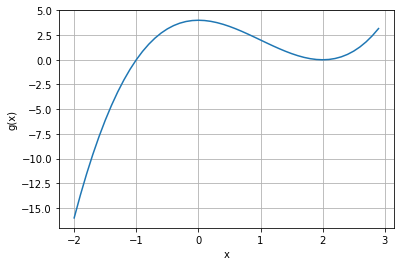

In [21]:
x = np.arange(-2,3,0.1)
y = g(x)

plt.plot(x,y)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('g(x)')

What do you notice about the convergence rates in these two cases? Let's examine it more carefully. The function below returns the individual steps of the Newton-Raphson algorithm.

In [22]:
def FindRootNewtonRaphsonSteps(f, df, x0, tol):
    steps = np.array([x0])
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        steps = np.append(steps, x0)
        count += 1
    return steps

Using the above function:
- compute the steps for the function $g(x)$ with  $x_0 = 3$. Assign the result to a variable.
- compute the steps for the function $g(x)$ with  $x_0 = -2$. Assign the result to a different variable.

In [88]:
root1 = 2
g1 = FindRootNewtonRaphsonSteps(g, dg, 3, 1e-15)

In [89]:
root2 = -1
g2 = FindRootNewtonRaphsonSteps(g, dg, -2, 1e-15)

Plot the absolute difference between the steps and the root, i.e., $|x_n - x_*|$, on a log scale.

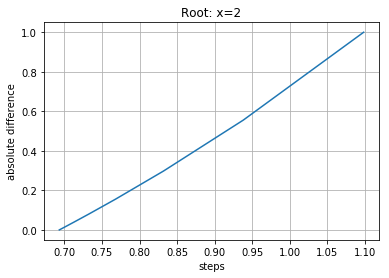

In [138]:
x1 = abs(g1)
y1 = abs(g1-root1)

plt.plot(np.log(x1), y1)
plt.title('Root: x=2')
plt.xlabel('steps')
plt.ylabel('absolute difference')
plt.grid(True)

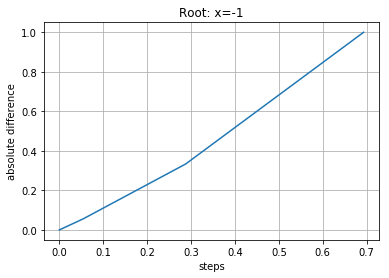

In [139]:
x2 = abs(g2)
y2 = abs(g2-root2)


plt.plot(np.log(x2),y2)
plt.title('Root: x=-1')
plt.xlabel('steps')
plt.ylabel('absolute difference')
plt.grid(True)

You should find the difference for the repeated root looks linear on the log-scale, which is the same as we saw for the bisection method. This (correctly) suggests that for repeated roots the Newton-Raphson converges linearly (rather than quadratically)

**Commit this question to your git repository and push the changes to GitHub**

## Submitting the assignment

Submit the assignment the same way you did with the first one.

To submit your assignment you should zip the ACM20030-Assignments folder. Rename the zip file ACM20030-Assignments2-STUDENTNUMBER.zip where STUDENTNUMBER is your student number. Upload the zip file to BrightSpace.